#***Student Name: Ji Qi*** , ***Session B1***



# Import packages

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# Basic Info about the Data

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## temp1.csv
- Download the variables of financial statement for "Data Date" 2021-01 through 2021-12 from WRDS Compustat and store into temp1.csv 
- Import temp1.csv file



In [44]:
temp1 = pd.read_csv('/content/drive/MyDrive/BA_870/HW/4/temp1.csv')

- No missing value for temp1.csv

In [45]:
temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gvkey     1886 non-null   int64  
 1   datadate  1886 non-null   int64  
 2   fyear     1886 non-null   int64  
 3   indfmt    1886 non-null   object 
 4   consol    1886 non-null   object 
 5   popsrc    1886 non-null   object 
 6   datafmt   1886 non-null   object 
 7   tic       1886 non-null   object 
 8   curcd     1886 non-null   object 
 9   ceq       1886 non-null   float64
 10  csho      1886 non-null   float64
 11  ebit      1886 non-null   float64
 12  ni        1886 non-null   float64
 13  sale      1886 non-null   float64
 14  costat    1886 non-null   object 
 15  prcc_c    1886 non-null   float64
dtypes: float64(6), int64(3), object(7)
memory usage: 235.9+ KB


- first 5 rows of temp1

In [46]:
temp1.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,ceq,csho,ebit,ni,sale,costat,prcc_c
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,974.4,35.375,65.50,35.80,1651.400,A,36.22
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,-7340.0,647.728,-5514.00,-1993.00,29882.000,A,17.96
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,5906.2,112.927,805.31,618.72,3803.835,A,70.59
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,35802.0,1764.082,8966.00,7071.00,43075.000,A,140.74
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,7497.0,1207.000,3678.00,3162.00,16434.000,A,143.90


- For **Common/Ordinary Equity - Total (CEQ)**, **Earnings Before Interest and Taxes (EBIT)**, **Net Income (Loss) (NI)** and **Sales/Turnover (Net) (SALE)**, those financial variables have negative values. Especially, **Earnings Before Interest and Taxes (EBIT)** and **Sales/Turnover (Net) (SALE)** even have value equal to '0'. Thus, when we generate financial ratios like **Price / Sales** or **Price / EBIT**, it would be better to treat those two variables as numerator, which could avoid the infinite values.

In [47]:
temp1.describe()

,gvkey,datadate,fyear,ceq,csho,ebit,ni,sale,prcc_c
count,1886.000000,1.886000e+03,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000,1886.000000
mean,62189.838282,2.021110e+07,2020.911983,5024.836357,216.213565,1309.802269,942.737848,8418.783976,104.209820
std,67853.146760,2.954896e+02,0.283395,16277.562975,617.870951,5154.950167,4208.808452,28707.012557,236.957951
min,1004.000000,2.021013e+07,2020.000000,-14999.000000,1.161000,-6273.000000,-9501.000000,-69.296000,0.355500
25%,11641.250000,2.021123e+07,2021.000000,416.276000,37.220250,48.110500,16.138750,513.042750,25.022500
50%,25281.000000,2.021123e+07,2021.000000,1109.486000,73.807500,211.177000,135.238000,1596.892000,51.940000
75%,125591.250000,2.021123e+07,2021.000000,3316.116500,176.940000,807.034250,554.200000,5560.085500,107.657500
max,317264.000000,2.021123e+07,2021.000000,259289.000000,16426.786000,108949.000000,94680.000000,556933.000000,5908.870000


In [48]:
# For Earnings Before Interest and Taxes (EBIT) = 0
temp1[temp1.ebit.isin([0])]

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,ceq,csho,ebit,ni,sale,costat,prcc_c
943,25283,20210131,2020,INDL,C,D,STD,KSS,USD,5196.0,158.0,0.0,-163.0,15955.0,A,40.69


In [49]:
# For Sales/Turnover (Net) (SALE) = 0
temp1[temp1.sale.isin([0])]

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,ceq,csho,ebit,ni,sale,costat,prcc_c
515,12711,20210930,2021,INDL,C,D,STD,CVM,USD,56.534,43.207,-36.194,-36.361,0.0,A,7.1000
673,18159,20211231,2021,INDL,C,D,STD,AGIO,USD,1291.975,54.334,-378.418,1604.715,0.0,A,32.8700
737,19600,20211231,2021,INDL,C,D,STD,CBAY,USD,132.937,84.678,-87.582,-89.998,0.0,A,3.3800
755,20018,20211231,2021,INDL,C,D,STD,ALDX,USD,205.736,58.081,-56.219,-57.776,0.0,A,4.0000
772,20600,20211130,2021,INDL,C,D,STD,NG,USD,78.282,332.416,-20.210,-40.536,0.0,A,6.8600
793,21032,20211231,2021,INDL,C,D,STD,VKTX,USD,201.884,78.248,-55.682,-54.990,0.0,A,4.6000
978,26081,20211231,2021,INDL,C,D,STD,KURA,USD,506.609,66.572,-131.258,-130.466,0.0,A,14.0000
988,26349,20211231,2021,INDL,C,D,STD,AXSM,USD,15.630,37.817,-124.707,-130.403,0.0,A,37.7800
1025,27716,20211231,2021,INDL,C,D,STD,MDGL,USD,196.107,17.103,-242.482,-241.846,0.0,A,84.7400
1109,29251,20210430,2020,INDL,C,D,STD,KALV,USD,257.193,24.423,-57.923,-46.244,0.0,A,18.9900


## ProjectTickers.csv 
- Import ProjectTickers.csv file
- 3 columns: **Ticker** (the stock's ticker symbol), **Name** (the name of each company), and **RetTYD** (the year-to-date stock return of each company from January 1, 2022 to April 14, 2022). 

In [50]:
ticker = pd.read_csv('/content/drive/MyDrive/BA_870/HW/4/ProjectTickers.csv')
ticker.head()

,Ticker,Name,RetYTD
0,A,Agilent Technologies,-0.2080
1,AA,Alcoa Corp,0.4731
2,AAL,American Airlines Gp,0.0579
3,AAN,Aarons Holdings Company,-0.1327
4,AAON,Aaon Inc,-0.3456


- No missing value for ProjectTickers.csv file

In [51]:
ticker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886 entries, 0 to 1885
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  1886 non-null   object 
 1   Name    1886 non-null   object 
 2   RetYTD  1886 non-null   float64
dtypes: float64(1), object(2)
memory usage: 44.3+ KB


- first 5 rows of ticker

In [52]:
ticker.head()

,Ticker,Name,RetYTD
0,A,Agilent Technologies,-0.2080
1,AA,Alcoa Corp,0.4731
2,AAL,American Airlines Gp,0.0579
3,AAN,Aarons Holdings Company,-0.1327
4,AAON,Aaon Inc,-0.3456


# Data Merging (temp1.csv & ProjectTickers.csv)

In [53]:
df = pd.merge(temp1, ticker, how = 'outer', left_on= 'tic', right_on= 'Ticker', indicator= True)
df._merge.value_counts()

both          1886
left_only        0
right_only       0
Name: _merge, dtype: int64

- No missing value for this merged dataset

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1886 entries, 0 to 1885
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   gvkey     1886 non-null   int64   
 1   datadate  1886 non-null   int64   
 2   fyear     1886 non-null   int64   
 3   indfmt    1886 non-null   object  
 4   consol    1886 non-null   object  
 5   popsrc    1886 non-null   object  
 6   datafmt   1886 non-null   object  
 7   tic       1886 non-null   object  
 8   curcd     1886 non-null   object  
 9   ceq       1886 non-null   float64 
 10  csho      1886 non-null   float64 
 11  ebit      1886 non-null   float64 
 12  ni        1886 non-null   float64 
 13  sale      1886 non-null   float64 
 14  costat    1886 non-null   object  
 15  prcc_c    1886 non-null   float64 
 16  Ticker    1886 non-null   object  
 17  Name      1886 non-null   object  
 18  RetYTD    1886 non-null   float64 
 19  _merge    1886 non-null   category
dtypes: categ

- first 5 rows of this merged dataset

In [55]:
df.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,ceq,csho,ebit,ni,sale,costat,prcc_c,Ticker,Name,RetYTD,_merge
0,1004,20210531,2020,INDL,C,D,STD,AIR,USD,974.4,35.375,65.50,35.80,1651.400,A,36.22,AIR,AAR Corp,0.2944,both
1,1045,20211231,2021,INDL,C,D,STD,AAL,USD,-7340.0,647.728,-5514.00,-1993.00,29882.000,A,17.96,AAL,American Airlines Gp,0.0579,both
2,1075,20211231,2021,INDL,C,D,STD,PNW,USD,5906.2,112.927,805.31,618.72,3803.835,A,70.59,PNW,Pinnacle West Capital Corp,0.0985,both
3,1078,20211231,2021,INDL,C,D,STD,ABT,USD,35802.0,1764.082,8966.00,7071.00,43075.000,A,140.74,ABT,Abbott Laboratories,-0.1638,both
4,1161,20211231,2021,INDL,C,D,STD,AMD,USD,7497.0,1207.000,3678.00,3162.00,16434.000,A,143.90,AMD,Adv Micro Devices,-0.3533,both


# Feature Engineering (Creates 4 Market Ratios)
- Price/Book = (PRCC_C * CSHO ) / CEQ
- P/E = (PRCC_C * CSHO ) / NI
- P/EBIT = (PRCC_C * CSHO ) / EBIT
- P/SALES = (PRCC_C * CSHO ) / SALE

- Invert each of the ratios to make them "better behaved".
  - Book/Price = 1/[Price/Book]
  - E/P = 1/[P/E]
  - EBIT/P = 1/[P/EBIT]
  - SALE/P = 1/[P/SALES]


In [56]:
df['Book/Price'] = df['ceq'] / (df['prcc_c'] * df['csho'])
df['E/P'] = df['ni'] / (df['prcc_c'] * df['csho'])
df['EBIT/P'] = df['ebit'] / (df['prcc_c'] * df['csho'])
df['SALE/P'] = df['sale'] / (df['prcc_c'] * df['csho'])

# Check for missing values, outliers and data error

- Create a new dataframe by selecting the 4 finance ratios as the independent variables and RetYTD as a dependent variable.

In [57]:
df = df[['Ticker','Book/Price', 'E/P', 'EBIT/P','SALE/P', 'RetYTD']]

- No missing value for each created financial ratios

In [58]:
df[['Book/Price', 'E/P', 'EBIT/P','SALE/P']].isnull().sum()

Book/Price    0
E/P           0
EBIT/P        0
SALE/P        0
dtype: int64

In [59]:
df_model = df[['Book/Price', 'E/P', 'EBIT/P','SALE/P']]

- below are the boxplots for all those finance ratios.

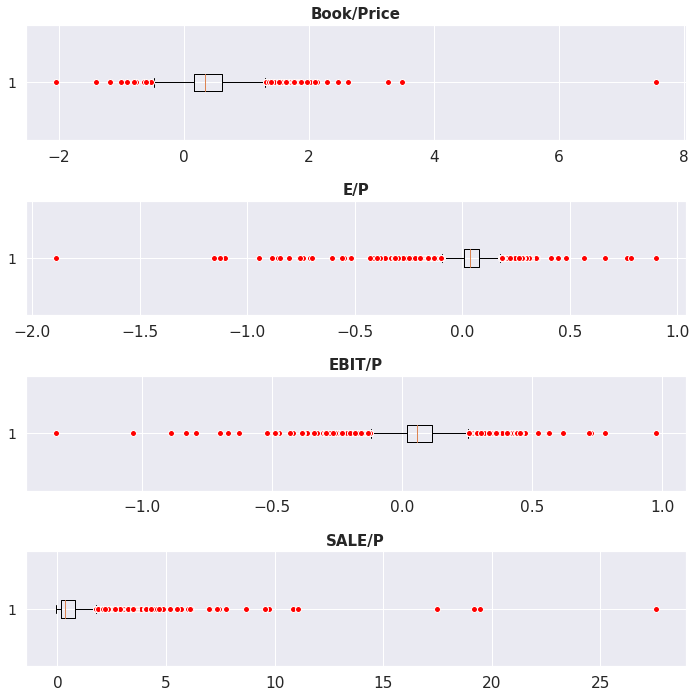

In [60]:
#Creating boxplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

fig, axs = plt.subplots(len(df_model.columns),1, figsize=(10,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_model.iloc[:,i], flierprops=red_circle, meanprops=mean_shape, vert = False)
    ax.set_title(df_model.columns[i], fontsize=15, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

- below are the histograms for all those finance ratios.

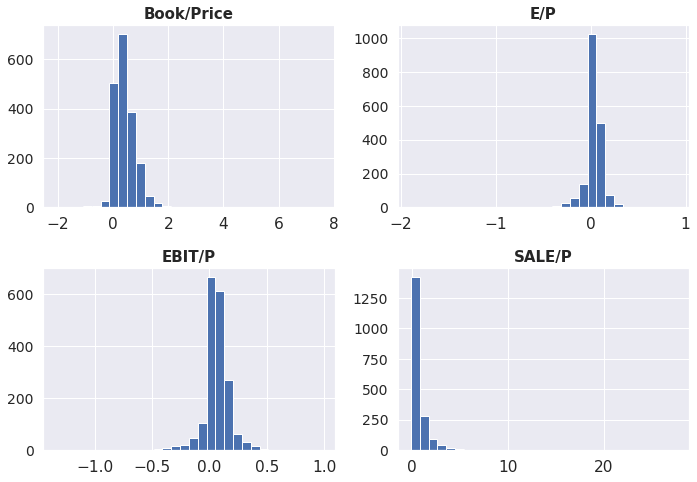

In [61]:
#Creating histogram of each column with its own scale
fig, axs = plt.subplots(2,2, figsize=(10,7))

for i, ax in enumerate(axs.flat):
    ax.hist(df_model.iloc[:,i], bins = 30)
    ax.set_title(df_model.columns[i], fontsize=15, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

## Summary

- According to the multiple box plots above, every column has several outliers above 75 percentile and below 25 percentile. However, **sale / price** only has outliers which are above 75 percentile. In other words, the distribution of **sale / price** is right-skewed and the distributions of the rest 3 ratios are close to normal, which is proved by the above 4 histograms.

- Since, we only have 1886 data points, dropping some outliers may decrease the model predictive power

- I will use Winsorization method to deal with outliers before establishing the linear regression models

# Handle the outliers (Winsorization)

- WINSORIZE within the range of 1% and 98% quantiles

In [62]:
from scipy.stats.mstats import winsorize
# WINSORIZE within the range of 1% and 98% quantiles
df_win = winsorize(df_model, (0.01, 0.02))
df_win = pd.DataFrame(df_win, columns = df_model.columns )
df_win.describe()

,Book/Price,E/P,EBIT/P,SALE/P
count,1886.000000,1886.000000,1886.000000,1886.000000
mean,0.421641,0.033190,0.063735,0.607557
std,0.368372,0.100633,0.113970,0.609798
min,-0.310090,-0.310090,-0.310090,-0.087004
25%,0.161112,0.008113,0.019641,0.176223
50%,0.337004,0.036704,0.056821,0.350729
75%,0.613868,0.076322,0.113822,0.814565
max,2.113777,0.898517,0.974888,2.113777


- Check the outliers after winsorization

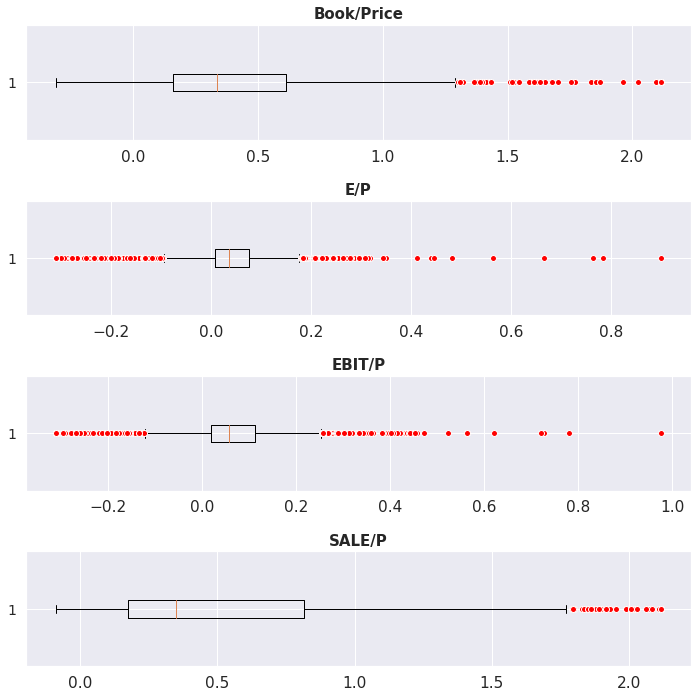

In [63]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

fig, axs = plt.subplots(len(df_win.columns),1, figsize=(10,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_win.iloc[:,i], flierprops=red_circle, meanprops=mean_shape, vert = False)
    ax.set_title(df_win.columns[i], fontsize=15, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

- Check the outliers after winsorization 

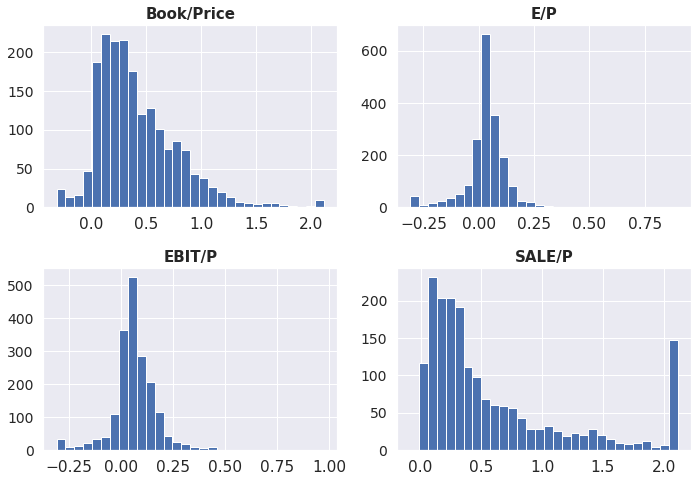

In [64]:
fig, axs = plt.subplots(2,2, figsize=(10,7))

for i, ax in enumerate(axs.flat):
    ax.hist(df_win.iloc[:,i], bins = 30)
    ax.set_title(df_win.columns[i], fontsize=15, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

## Summary

- After Winsorization, **sale / price** is less right-skewed and the distributions of the rest 3 ratios are more close to normal, which is proved by the above 4 histograms and 4 boxplots.

## Well-prepared dataset

In [65]:
df_final = pd.concat([df['Ticker'], df_win, df['RetYTD']], axis = 1)
df_final.head()

,Ticker,Book/Price,E/P,EBIT/P,SALE/P,RetYTD
0,AIR,0.760488,0.027941,0.051121,1.288865,0.2944
1,AAL,-0.310090,-0.171320,-0.310090,2.113777,0.0579
2,PNW,0.740913,0.077616,0.101023,0.477178,0.0985
3,ABT,0.144202,0.028480,0.036113,0.173496,-0.1638
4,AMD,0.043164,0.018205,0.021176,0.094618,-0.3533


## Export assign4.csv file

In [66]:
df_final.to_csv('assign4.csv', index = False)

# Correlations between Book/Price, E/P, EBIT/P, SALES/P, and RetYTD

In [67]:
corr = df_final.iloc[:,1:].corr()
corr

,Book/Price,E/P,EBIT/P,SALE/P,RetYTD
Book/Price,1.000000,0.231359,0.259630,0.289212,0.242576
E/P,0.231359,1.000000,0.701646,0.141892,0.062988
EBIT/P,0.259630,0.701646,1.000000,0.320887,0.130663
SALE/P,0.289212,0.141892,0.320887,1.000000,0.172801
RetYTD,0.242576,0.062988,0.130663,0.172801,1.000000


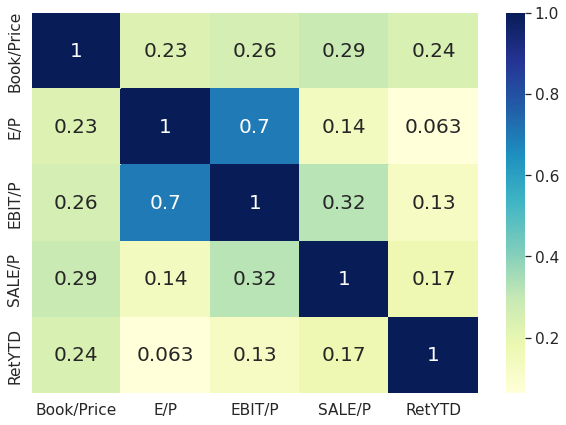

In [68]:
plt.figure(figsize = (10, 7))
sns.set(font_scale=1.4)
sns.heatmap(corr,annot=True,cmap="YlGnBu",annot_kws={"fontsize":20})

## Summary

- **Book / Price** is the **most positive correlated** to **RetYTD** and **E / P** is the **least positive correlated** to **RetYTD**. The corresponding pearson's correlation coefficients are **0.24** and **0.063**, respectively.

- The pearson's correlation coefficients of **EBIT/P & RetYTD (0.13)** and **SALES/P & RetYTD (0.17)** are all more than 0, which demonstrates that there are positive correlation between EBIT/P & RetYTD or SALES/P & RetYTD. **However, the correlation of two pairs are not significant.**

# Estimate 4 linear regression models (using StatsModel API) as follows:
- RetYTD = a + b1*Book/P + e
- RetYTD = a + b2*E/P + e
- RetYTD = a + b3*EBIT/P + e
- RetYTD = a + b4*SALES/P + e

In [94]:
# Create a empty output dataframe
output = pd.DataFrame(columns = ['Independent-Financial-Ratio', 'Coefficients', 't-value', 'p-value', '[0.025', '0.975]', 'R-squared', 'Adj. R-squared'])
output

,Independent-Financial-Ratio,Coefficients,t-value,p-value,[0.025,0.975],R-squared,Adj. R-squared


In [95]:
# Define a Linear Regression function 
def lrmodel(datax,datay, i):
    y = datay
    X = datax[i]
    # Use statsmodels
    X = sm.add_constant(X) # adding a constant
    model = sm.OLS(y, X).fit()
    #print(model.pvalues[1])
    ci_low = model.conf_int(alpha=0.05, cols=None).iloc[1,:][0]
    ci_high = model.conf_int(alpha=0.05, cols=None).iloc[1,:][1]
    #return regression output
    return (i, model.params[1], model.tvalues[1],model.pvalues[1],ci_low, ci_high, model.rsquared, model.rsquared_adj)

for i in df_final[['Book/Price',	'E/P' ,	'EBIT/P', 'SALE/P']].columns:
    output.loc[len(output.index)] = lrmodel(df_final[['Book/Price',	'E/P' ,	'EBIT/P', 'SALE/P']], df_final['RetYTD'] ,i)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [96]:
output

,Independent-Financial-Ratio,Coefficients,t-value,p-value,[0.025,0.975],R-squared,Adj. R-squared
0,Book/Price,0.160545,10.853201,1.162647e-26,0.131534,0.189557,0.058843,0.058344
1,E/P,0.152599,2.739441,6.212389e-03,0.043350,0.261848,0.003967,0.003439
2,EBIT/P,0.279509,5.720477,1.232900e-08,0.183681,0.375337,0.017073,0.016551
3,SALE/P,0.069087,7.614997,4.145130e-14,0.051294,0.086880,0.029860,0.029345


## Explain and interpret the R2 and AdjR2 for the 4 regressions

- Based on the R2 and AdjR2, I realized that R2 and AdjR2 are almost the same. To compare the model predictive power, I will use AdjR2.

- we found that the model using **Book / Price** with (**highest R2 = 0.058843 and highest AdjR2 = 0.058344**) indicates a better fit and 5.83% of year-to-date stock return  could be explained by **Book / Price** ratio. However, highest AdjR2 = 0.058344 still indicates that **it predicts year-to-date stock return poorly**.

- In addition, the model using **E / P** with (**lowest R2 = 0.003967 and lowest AdjR2 = 0.003439**) shows that 0.34% of year-to-date stock return could be explained by **E / P** ratio and **the model has the least predictive power**.

- Lastly, the model with **EBIT/P**	or **SALE/P** has **medium level predictive power** among all 4 models.
  - the model using **EBIT/P** with (**R2 = 0.017073 and AdjR2 = 0.016551**) shows that 1.66% of year-to-date stock return could be explained by **EBIT/P** ratio
  - the model using **SALE/P** with (**R2 = 0.029860	and AdjR2 = 0.029345**) shows that 2.93% of year-to-date stock return could be explained by **SALE/P** ratio

- In genearl, **All 4 models predict year-to-date stock return poorly based on the Adj R2**.

## Explain and interpret and compare the values of b1 to b4

* For all 4 Models, **The coefficients of Book/Price, E/P, EBIT/P, SALE/P** are **all statistically significant at 5%** based on their correponding p-values (< 0.05). 

* **On average, for each increase in *Book/Price* (Double Book Value and Keep the Price same), the RetYTD will increase 0.160545**. In other words, lower Price / Book ratio will increase RetYTD (the stock may be undervalued). **95% of coefficients of Book/Price** are within [0.131534, 0.189557].	

* **On average, for each increase in *E/P* (Double Earning Per Share and Keep the Price same), the RetYTD will increase 0.152599**. In other words, lower P/E ratio will increase RetYTD (the stock may be undervalued). **95% of coefficients of E/P** are within [0.043350, 0.261848].	

* **On average, for each increase in *EBIT/P* (Double EBIT and Keep the Price same), the RetYTD will increase 0.279509**. In other words, lower P/EBIT ratio will increase RetYTD (The investment are more attractive). **95% of coefficients of EBIT/P** are within [0.183681, 0.375337].	

* **On average, for each increase in *SALE/P* (Double Sales and Keep the Price same), the RetYTD will increase 0.069087**. In other words, lower P/Sales ratio will increase RetYTD (The investment are more attractive). **95% of coefficients of SALE/P** are within [0.051294, 0.086880].	

* In summary, if we assume the same unit increase in each of 4 ratios, EBIT/P will cause the most increase in RetYTD by 0.279509, and SALE/P will lead to the least increase in RetYTD by 0.069087. Book/Price and E/P will result in the similar increase in RetYTD by 0.160545 and 0.152599, respectively.



## Explain and interpret and compare the t-stats of b1 to b4

- **All 4 *t-values*** are **10.853201, 2.739441, 5.720477 and 7.614997**, respectively and all more than 1.96.
- Thus, it indicates that **coefficients for those 4 variables are significant different from 0 at 5% level**.


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

In [100]:
!jupyter nbconvert --to pdf '/content/drive/MyDrive/BA_870/HW/4/Assignment4_Ji_Qi.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/BA_870/HW/4/Assignment4_Ji_Qi.ipynb to pdf
[NbConvertApp] Support files will be in Assignment4_Ji_Qi_files/
[NbConvertApp] Making directory ./Assignment4_Ji_Qi_files
[NbConvertApp] Making directory ./Assignment4_Ji_Qi_files
[NbConvertApp] Making directory ./Assignment4_Ji_Qi_files
[NbConvertApp] Making directory ./Assignment4_Ji_Qi_files
[NbConvertApp] Making directory ./Assignment4_Ji_Qi_files
[NbConvertApp] Writing 72588 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', './notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', './notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 219985 bytes to /content/drive/MyDrive/BA_870/HW/4/Assignment4_Ji_Qi.pdf
